### Importing Necessary Libraries and Packages

In [ ]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report


### Importing Dataset

In [3]:
df = pd.read_csv('datasets/Retail_Store.csv', encoding='latin1')
pd.set_option('display.max_columns',None)
df.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  \
0                   0           73  Sporting Goods        Caguas   
1                   1           73  Sporting Goods        Caguas   
2                   0           73  Sporting Goods      San Jose   
3                   0           73  Sporting Goods   Los Angeles   
4                   0           73  Sporting Goods        Caguas   

  Customer Country Customer Email Customer Fname  Customer Id Customer Lname  \
0      Puerto Rico      XXXXXXXXX          Cally        20755       Holloway   
1      Puerto Rico      XXXXXXXXX          Irene        19492           Luna   
2          EE. UU.      XXXXXXXXX        Gillian        19491      Maldonado   
3          EE. UU.      XXXXXXXXX           Tana        19490           Tate   
4      Puerto Rico      XXXXXXXXX           Orli        19489      Hendricks   

  Customer Password Customer Segment Customer State           Customer Street  \
0         XXXXXXXXX         Consumer             PR  5365 Noble Nectar Island   
1         XXXXXXXXX         Consumer             PR          2679 Rustic Loop   
2         XXXXXXXXX         Consumer             CA      8510 Round Bear Gate   
3         XXXXXXXXX      Home Office             CA           3200 Amber Bend   
4         XXXXXXXXX        Corporate             PR  8671 Iron Anchor Corners   

   Customer Zipcode  Department Id Department Name   Latitude   Longitude  \
0             725.0              2         Fitness  18.251453  -66.037056   
1             725.0              2         Fitness  18.279451  -66.037064   
2           95125.0              2         Fitness  37.292233 -121.881279   
3           90027.0              2         Fitness  34.125946 -118.291016   
4             725.0              2         Fitness  18.253769  -66.037048   

         Market  Order City Order Country  Order Customer Id  \
0  Pacific Asia      Bekasi     Indonesia              20755   
1  Pacific Asia     Bikaner         India              19492   
2  Pacific Asia     Bikaner         India              19491   
3  Pacific Asia  Townsville     Australia              19490   
4  Pacific Asia  Townsville     Australia              19489   

  order date (DateOrders)  Order Id  Order Item Cardprod Id  \
0         1/31/2018 22:56     77202                    1360   
1         1/13/2018 12:27     75939                    1360   
2         1/13/2018 12:06     75938                    1360   
3         1/13/2018 11:45     75937                    1360   
4         1/13/2018 11:24     75936                    1360   

   Order Item Discount  Order Item Discount Rate  Order Item Id  \
0            13.110000                      0.04         180517   
1            16.389999                      0.05         179254   
2            18.030001                      0.06         179253   
3            22.940001                      0.07         179252   
4            29.500000                      0.09         179251   

   Order Item Product Price  Order Item Profit Ratio  Order Item Quantity  \
0                    327.75                     0.29                    1   
1                    327.75             

### Exploratory Data Analysis (EDA)

In [ ]:
print("Number of Columns: ", df.shape[1])
print("Number of Rows: ", df.shape[0])
# Missing data in columns: Customer Lname, Customer Zipcode, Order Zipcode
# Column Product Description is completely empty

Number of Columns:  53
Number of Rows:  180519


Checking for any missing values in columns

In [9]:
def col_missing_values(df):
    for i in df.columns:
        if df[i].isna().sum()>0:
            print("Column",i,"is missing ",str(df[i].isna().sum()),"values.")

col_missing_values(df)

Column Customer Lname is missing  8 values.
Column Customer Zipcode is missing  3 values.
Column Order Zipcode is missing  155679 values.
Column Product Description is missing  180519 values.


Dropping these columns, and other columns we deem have no valuable information

In [10]:
df = df.drop(columns = ['Customer Lname','Customer Zipcode','Order Zipcode','Product Description','Customer Email','Customer Password','Product Image'])

Use a heatmap to get an overview of the relationships and significance between 2 features

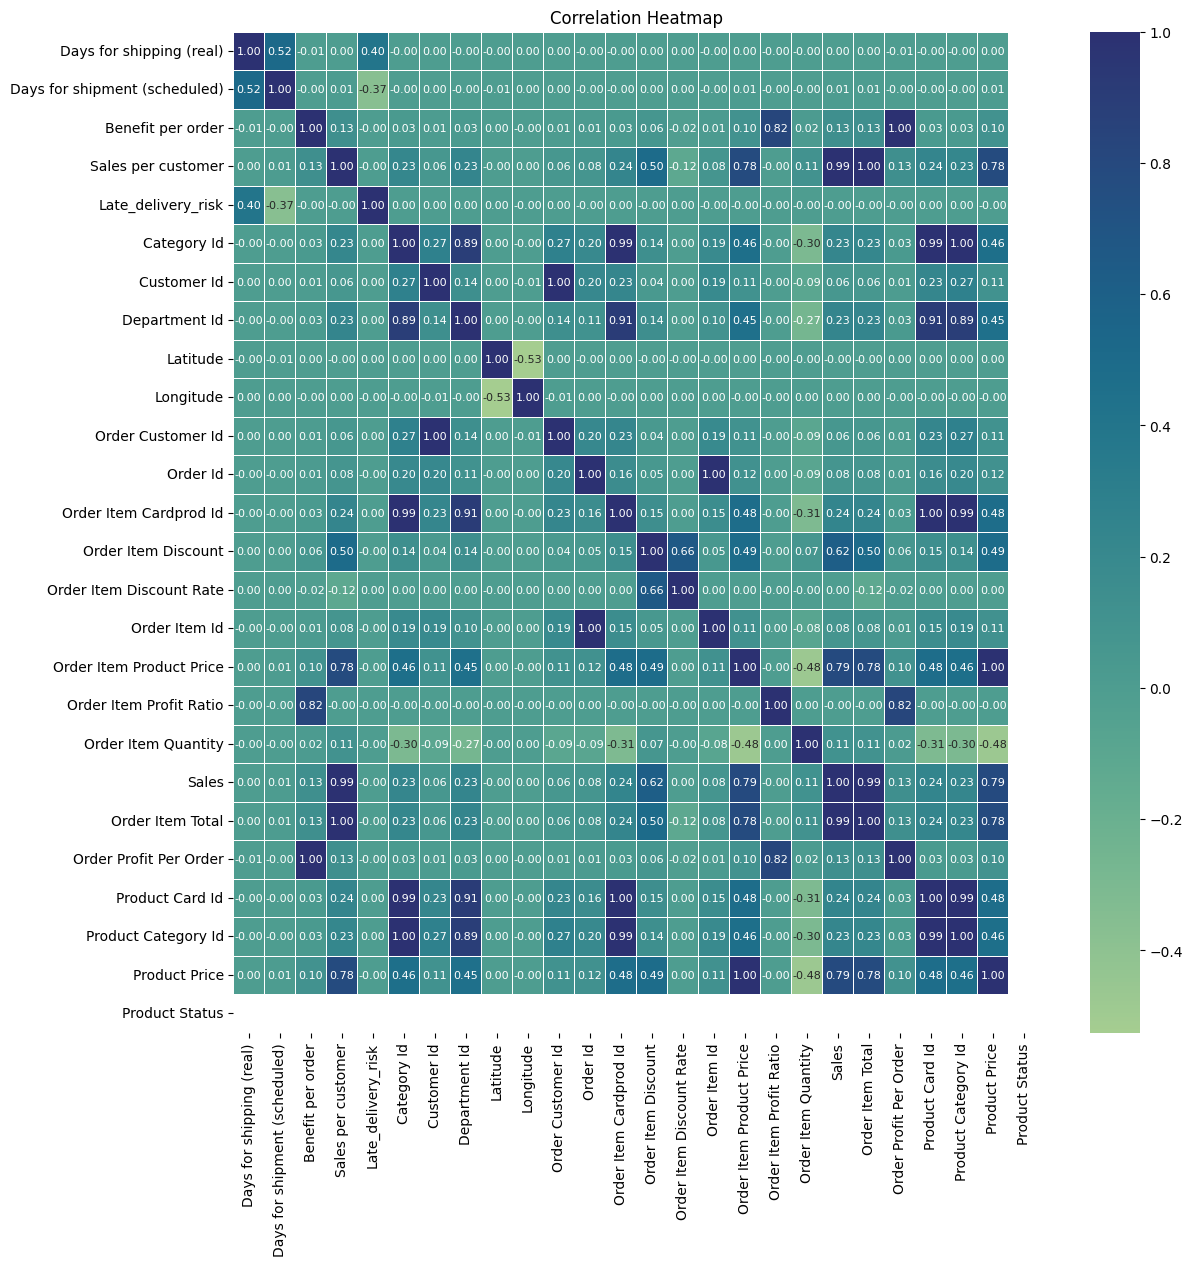

In [15]:
# Numeric_only=True, as .corr() can only take float or int 
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(13, 13))  
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt='.2f', linewidths=0.5,annot_kws={"size": 8})
plt.title('Correlation Heatmap')
plt.show()

### Insights from Heatmap:
Duplicate Columns (Same data, different columns)
* **Benefit per Order**, Order Profit Per Order 
* **Product Price**, Order Item Product Price
* **Category Id**, Product Category Id, Product Card Id, Order item Cardprod Id
* **Sales**, Sales Per Customer, Order Item Total

In [ ]:
df['late_delivery'] = (df['Days for shipping (real)'] > df['Days for shipment (scheduled)'])

<Axes: xlabel='late_delivery', ylabel='Late_delivery_risk'>

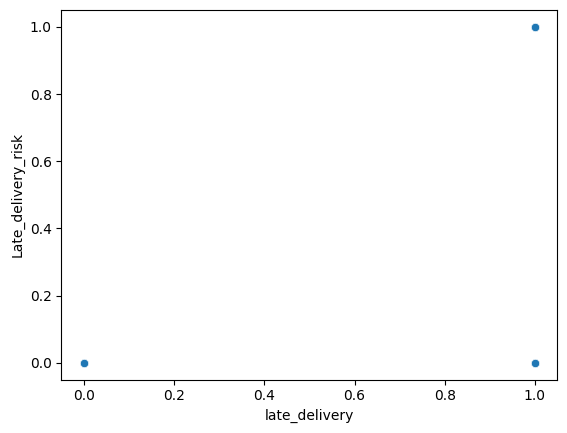

In [30]:
sns.scatterplot(x="late_delivery",y="Late_delivery_risk",data=df)